# Restaurant data classification

![Restaurant pic](https://assets.simpleviewcms.com/simpleview/image/fetch/c_pad,h_600,q_75,w_1122/https://lasvegas.simpleviewcrm.com/images/listings/original_Bacchanal-Buffet-at-Caesars-Palace.jpg)

In this project we will dive deep into restaurant data. We will develop a classification model to predict the type of review the user might leave from the given text. We will also draw wordclouds.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('restaurant.csv', encoding='latin-1')
df.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17


## EDA

In [3]:
df[df.duplicated()]

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date


In [4]:
df.isnull().sum()

Unnamed: 0     0
review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

In [5]:
df.shape

(10417, 10)

In [6]:
df.sample()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
888,2439156,f5DYathwGDXwiAlqPzXPiQ,H1Z60BTdbfi9aAtd61rJOg,RESDUcs7fIiihp38-d6_6g,1,0,0,0,Went there for dinner 7/3/16. Absolutely the w...,2016-07-05 19:27:51


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10417 entries, 0 to 10416
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10417 non-null  int64 
 1   review_id    10417 non-null  object
 2   user_id      10417 non-null  object
 3   business_id  10417 non-null  object
 4   stars        10417 non-null  int64 
 5   useful       10417 non-null  int64 
 6   funny        10417 non-null  int64 
 7   cool         10417 non-null  int64 
 8   text         10417 non-null  object
 9   date         10417 non-null  object
dtypes: int64(5), object(5)
memory usage: 814.0+ KB


We will remove useless columns. We do not need 'Unnamed: 0', 'review_id', 'user_id', 'business_id'.

In [8]:
df.drop(['Unnamed: 0', 'review_id', 'user_id', 'business_id'], axis=1, inplace=True)

In [9]:
df.sample()

,stars,useful,funny,cool,text,date
9667,4,1,1,0,What can I say about this buffet that hasn't b...,2019-08-27 23:28:04


In [10]:
df['date'] = df['date'].astype('datetime64[ns]')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10417 entries, 0 to 10416
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   stars   10417 non-null  int64         
 1   useful  10417 non-null  int64         
 2   funny   10417 non-null  int64         
 3   cool    10417 non-null  int64         
 4   text    10417 non-null  object        
 5   date    10417 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 488.4+ KB


In [12]:
df.head()

,stars,useful,funny,cool,text,date
0,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18
1,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50
2,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09
3,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29
4,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

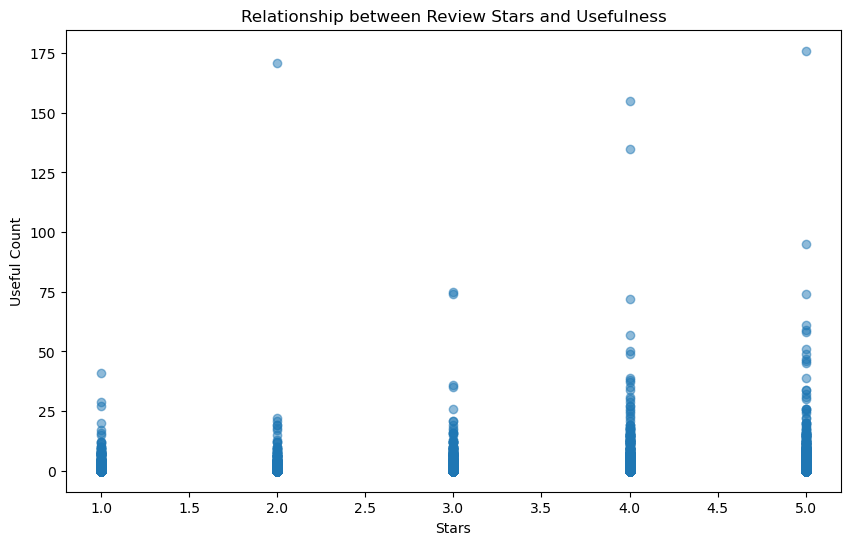

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(df['stars'], df['useful'], alpha=0.5)
plt.title('Relationship between Review Stars and Usefulness')
plt.xlabel('Stars')
plt.ylabel('Useful Count')
plt.show()

We see that the reviews that left more stars are the ones that got marked 'useful' by more people.

## Analyzing the 'text' column.

In [15]:
df['text']

0        After getting food poisoning at the Palms hote...
1        "A feast worthy of Gods"\n\nBaccarnal Buffet i...
2        The crab legs are better than the ones at Wick...
3        Not worth it! Too salty food and expensive! Th...
4        I would give this infinite stars if I could. M...
                               ...                        
10412    Best buffet ever! Irma was great, served us be...
10413    Hollllllyyyy moleyyyy! \n\nThis buffet was one...
10414    The selection is amazing and all the food is e...
10415    One of the best buffets I've had in Vegas. My ...
10416    I got a chance to go to the Bacchanal Buffett ...
Name: text, Length: 10417, dtype: object

### We will remove non-english reviews.

In [16]:
from langdetect import detect
from textblob import TextBlob as TB

Show all non-english languages.

In [17]:
[detect(row) for row in df['text'] if detect(row) != 'en']

['sv',
 'de',
 'da',
 'sv',
 'pt',
 'sv',
 'fr',
 'fr',
 'sv',
 'da',
 'de',
 'en',
 'es',
 'da',
 'da',
 'es',
 'da',
 'fr',
 'de',
 'de',
 'pt',
 'fr',
 'pt',
 'da',
 'sk',
 'sv',
 'es',
 'es',
 'es',
 'sv',
 'sv',
 'en',
 'es',
 'pt',
 'es',
 'pt',
 'es',
 'pt',
 'pt',
 'es',
 'es',
 'sv',
 'da',
 'fr',
 'pt',
 'pt',
 'da',
 'sv']

In [18]:
df.drop(df[df['text'].apply(detect) != 'en'].index, axis=0, inplace=True)

In [19]:
[detect(row) for row in df['text'] if detect(row) != 'en']

[]

In [20]:
df['text'][0]

"After getting food poisoning at the Palms hotel, I was scared to eat at any more buffets. But we figured with the high price tag, the positive reviews etc, it was worth a chance. I'm really glad we gave it a try. (btw I uploaded a collage of the things we ate)\n\nThe seafood line is by the far the longest, i would not recommend showing up in heels if you're female, my feet were killing me between the line at the door, the line to get sat, and the seafood line. Totally worth it though.\n\nThe prime rib was the best Ive ever had.\n\nI loved the sweet potato tots.\n\nI even have PHO!\n\nThe music was great and so was our server Alma, ( he was a older gentleman with a mustache and was very attentive and delightful).\n\nI will return next trip in more comfortable shoes. After a horrible visit at the palms with non stop issues in a matter of 48 hours, your establishment was truly the high light of our trip. Thank you for an exquisite dinner."

In [21]:
df['text'][6]

"Came for dinner at $55 per person at around 5pm (practically no line at all). Great service overall but food quality was variable. Wasn't a big fan of the chinese or the mexican food, but the sushi was delicious along with the salads. Our favorite was a quinoa arugula pomegranate salad along with the small cups of mozzarella and tomato drizzled in balsamic. For Italian, you can make your own pasta (seemed limited to spaghetti and penne, but several different toppings) and a gnocchi that could use a bit more seasoning; awful chewy calamari, didn't try the charcuterie. The seafood buffet and beef buffet was decent. You can also have made to order ramen, pho, udon, etc. Udon was OK. My fiance demolished his crab legs and we enjoyed the prime rib and the lamb chops. The pork belly was overly salty - couldn't eat it. Large array of desserts - my favorites chocolate cake, green tea white chocolate covered strawberries, boba thai iced tea, chocolate mousse, fudge, and fruit."

In [22]:
df['text'][19]

"I would recommend this buffet to those with an expensive palate. It is usually 50 dollars but because it was memorial day weekend it cost 70. Was it worth it? Yes and no. They use premium ingredients. The seafood bar had lobster claws, the burgers were made from kobe beef and the crab legs are sliced in half which means NO FIGHTING WITH YOUR FOOD. When you take all that into consideration you can easily eat your money's worth. The buffets is separated by different regions Italy, Mexico, etc.  They had some amazing Mexican soup with tripe and some other odd bist of the animal but it was flavourful. They have an actual pho station, fresh sushi, gourmet meats balls. Whatever you want it is hear. I still wouldn't say it was the best buffet I've ever been to because there was nothing that really stood out to me that I craved after I left. I just loved the fact that they offered things a usual buffet wouldn't offer. You can tell that every station but effort and into their food and it was n

## NLP prep work on text column

### Starting an NLP project

- Convert all to lowecase
- Remove punctiation
- Remove numbers
- Remove newline characters
- Remove stopwords (unnecessary words)
- Tokenize
- use Lemma & Stemma to get the stem of the words
- Vectorize

In [23]:
df['text'] = df['text'].str.lower()

In [24]:
df['text'][0]

"after getting food poisoning at the palms hotel, i was scared to eat at any more buffets. but we figured with the high price tag, the positive reviews etc, it was worth a chance. i'm really glad we gave it a try. (btw i uploaded a collage of the things we ate)\n\nthe seafood line is by the far the longest, i would not recommend showing up in heels if you're female, my feet were killing me between the line at the door, the line to get sat, and the seafood line. totally worth it though.\n\nthe prime rib was the best ive ever had.\n\ni loved the sweet potato tots.\n\ni even have pho!\n\nthe music was great and so was our server alma, ( he was a older gentleman with a mustache and was very attentive and delightful).\n\ni will return next trip in more comfortable shoes. after a horrible visit at the palms with non stop issues in a matter of 48 hours, your establishment was truly the high light of our trip. thank you for an exquisite dinner."

In [25]:
df['text'] = df['text'].str.replace('\n', '')

In [26]:
df['text'][0]

"after getting food poisoning at the palms hotel, i was scared to eat at any more buffets. but we figured with the high price tag, the positive reviews etc, it was worth a chance. i'm really glad we gave it a try. (btw i uploaded a collage of the things we ate)the seafood line is by the far the longest, i would not recommend showing up in heels if you're female, my feet were killing me between the line at the door, the line to get sat, and the seafood line. totally worth it though.the prime rib was the best ive ever had.i loved the sweet potato tots.i even have pho!the music was great and so was our server alma, ( he was a older gentleman with a mustache and was very attentive and delightful).i will return next trip in more comfortable shoes. after a horrible visit at the palms with non stop issues in a matter of 48 hours, your establishment was truly the high light of our trip. thank you for an exquisite dinner."

In [27]:
df['text'] = df['text'].str.replace('[^\w\s]', '', regex=True)

In [28]:
df['text'][0]

'after getting food poisoning at the palms hotel i was scared to eat at any more buffets but we figured with the high price tag the positive reviews etc it was worth a chance im really glad we gave it a try btw i uploaded a collage of the things we atethe seafood line is by the far the longest i would not recommend showing up in heels if youre female my feet were killing me between the line at the door the line to get sat and the seafood line totally worth it thoughthe prime rib was the best ive ever hadi loved the sweet potato totsi even have phothe music was great and so was our server alma  he was a older gentleman with a mustache and was very attentive and delightfuli will return next trip in more comfortable shoes after a horrible visit at the palms with non stop issues in a matter of 48 hours your establishment was truly the high light of our trip thank you for an exquisite dinner'

In [29]:
df['text'] = df['text'].str.replace('\d+', '', regex=True)

In [30]:
df['text'][16]

'im a little torn between  and  stars but overall you are going to visit a good buffet if you come here a lot of the posts says you wait a long time when you come which is prolly true in a lot of cases and probably for dinner but i guess we got lucky we came at about  and got to the cashier at about  im not sure we could have timed it any better because  we got to pay breakfast price of  and still enjoy lunch foods and  we got to eat some breakfast foods too  off if you are a rewards card member free to join we were seated quickly but the waitress is kind of slow probably manning too many tables from what i could see ok now for the food this was probably the best quality buffet ive been to in vegas you might be able to say wicked spoon or rio have more options but they definitely dont taste as good they have different types of clam dishes fish crab claws didnt see crab legs ceviche bbq prime rib brisket sausage mexican food somewhat small selection three different kind of fries mashed 

In [31]:
df.head()

,stars,useful,funny,cool,text,date
0,5,0,1,0,after getting food poisoning at the palms hote...,2012-12-04 03:10:18
1,4,39,21,29,a feast worthy of godsbaccarnal buffet in caes...,2014-01-17 00:50:50
2,4,1,1,1,the crab legs are better than the ones at wick...,2015-06-08 18:03:09
3,1,0,0,0,not worth it too salty food and expensive this...,2016-12-19 16:15:29
4,5,0,0,0,i would give this infinite stars if i could my...,2015-07-28 07:13:17


### Spell check

In [32]:
# from autocorrect import Speller

In [33]:
# spell = Speller()

In [34]:
# df['text'] = [spell(s) for s in df['text']]

I wanted to correct spelling on all the columns, but that was taking a lot of time. I left the code there anyway.

In [35]:
# from textblob import TextBlob as tb

In [36]:
# blob = tb(df['text'][0])
# blob.correct().string

In [37]:
# df['text'] = [tb(s).correct().string for s in df['text']]

This too takes a lot of time.

### A column to categorize reviews

In [38]:
import seaborn as sns

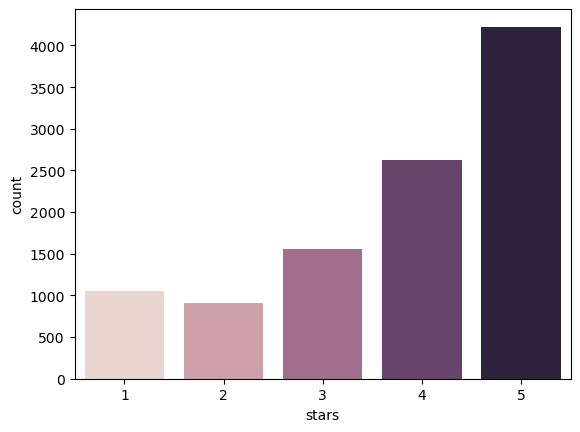

In [39]:
sns.countplot(x='stars', hue='stars', data=df, legend=False);

Reviews will be split into 3 categories: positive, neutral and negative. Splitting will be based on the stars given. We will give these categories numerical values to help training process. Positive reviews will get the score of 2. Neutral reviews will get the score of 1 and negative reviews will get the score of 0.

- Reviews with 4 and 5 stars will be considered positive reviews We give them the score 2.
- Reviews with 3 stars will be considered neutral reviews. We give them the score 1.
- Reviews with 1 or 2 stars will be considered negative reviews. We give them the score 0.

In [40]:
positivity = {
    # 5 & 4 star reviews will get score of 2.
    5: 2,
    4: 2,

    # Neutral reviews will get a score of 1.
    3: 1,

    # 2 & 1 star reviews will get a score of 0.
    2: 0,
    1: 0
}

In [41]:
df['positivity'] = df['stars'].map(positivity)

In [42]:
df.head()

,stars,useful,funny,cool,text,date,positivity
0,5,0,1,0,after getting food poisoning at the palms hote...,2012-12-04 03:10:18,2
1,4,39,21,29,a feast worthy of godsbaccarnal buffet in caes...,2014-01-17 00:50:50,2
2,4,1,1,1,the crab legs are better than the ones at wick...,2015-06-08 18:03:09,2
3,1,0,0,0,not worth it too salty food and expensive this...,2016-12-19 16:15:29,0
4,5,0,0,0,i would give this infinite stars if i could my...,2015-07-28 07:13:17,2


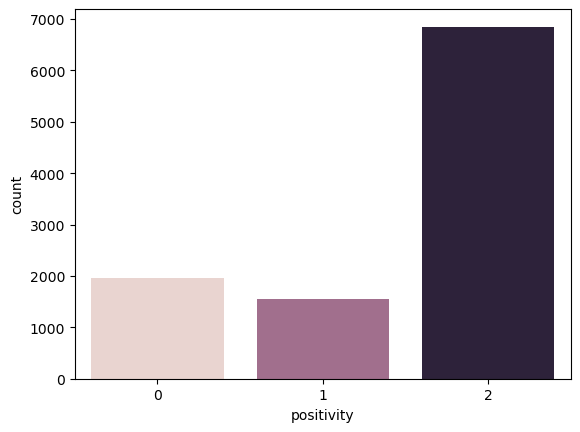

In [43]:
sns.countplot(x='positivity', hue='positivity', data=df, legend=False);

## Word Cloud

In [44]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [45]:
def wc(data, bgcolor='white', figsize=(10, 10)):
    plt.figure(figsize=figsize, facecolor='k')
    mask = np.array(Image.open('cloud.png'))
    wc = WordCloud(background_color=bgcolor, stopwords=STOPWORDS, mask=mask, collocations=False, contour_width=3, contour_color='cyan')
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

Word cloud for positive reviews 

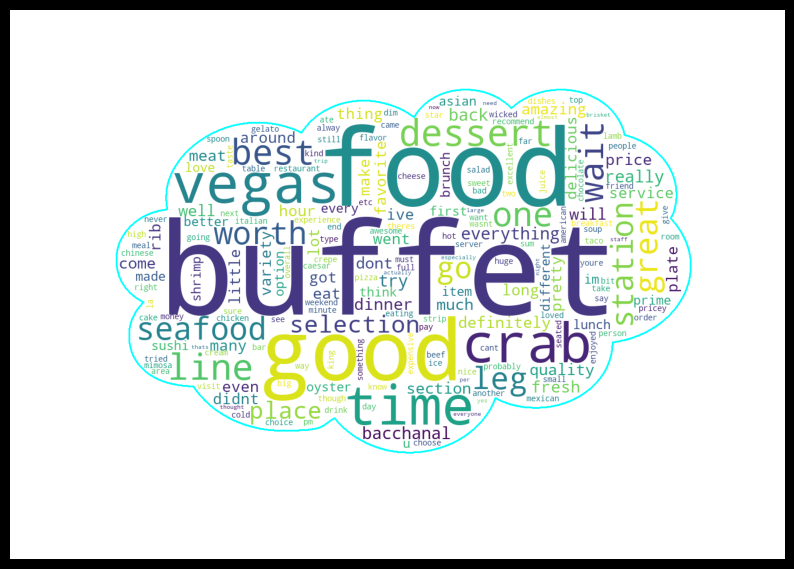

In [46]:
wc(df[df['positivity'] == 2]['text'])

And for neutral reviews

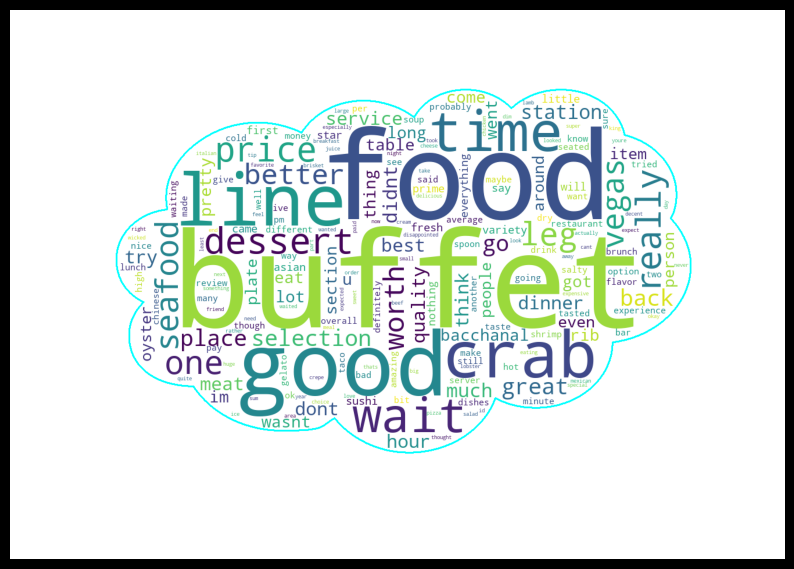

In [47]:
wc(df[df['positivity'] == 1]['text'])

For the negative reviews

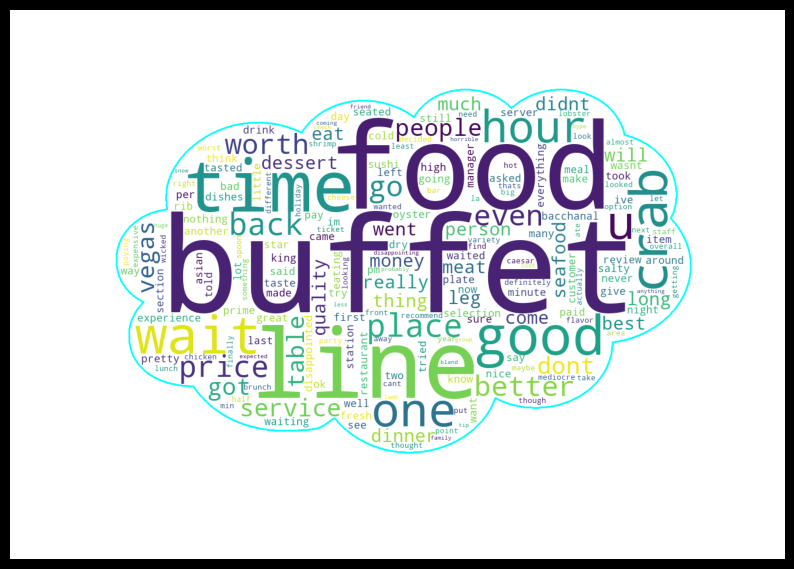

In [48]:
wc(df[df['positivity'] == 0]['text'])

The absolute best and absolute worst reviews

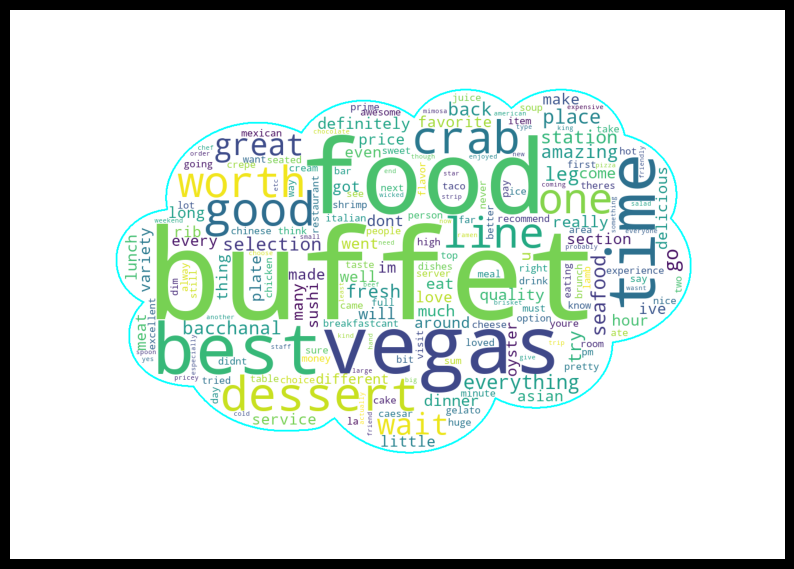

In [49]:
wc(df[df['stars'] == 5]['text'])

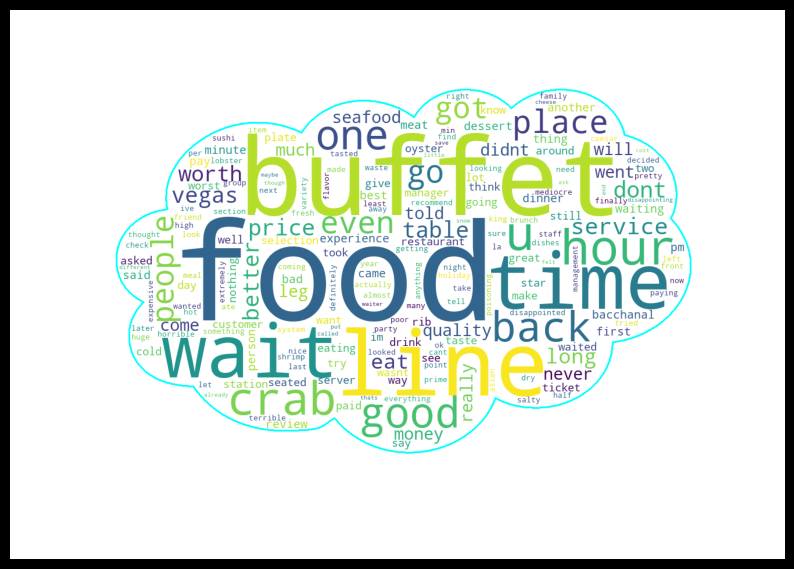

In [50]:
wc(df[df['stars'] == 1]['text'])

## Most commont words

In [51]:
df[df['positivity'] == 0]['text']

3        not worth it too salty food and expensive this...
12       food is fine better than most buffets when i r...
29       so i come here on my birthday thinking its the...
33       be careful using the restroom here while i was...
42       what a money pit food was terrible and not lab...
                               ...                        
10390    i  have eaten here for the breakfast and lunch...
10394    in thanksgiving day i stayed in line for three...
10401    i went to the wicked spoon at cosmopolitan and...
10402    i am one disappointed buffetloving foodie we f...
10410    came him from la thanksgiving week we decided ...
Name: text, Length: 1963, dtype: object

In [52]:
from collections import Counter
from nltk.corpus import stopwords
from nltk import download
download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/efeacikgoz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [53]:
texts = df[df['positivity'] == 0]['text']

In [54]:
allwords = ' '.join(texts).split()
allwords = [word for word in allwords if word not in stopwords.words('english')]

In [55]:
allwords

['worth',
 'salty',
 'food',
 'expensive',
 'furst',
 'kast',
 'visit',
 'buffet',
 'food',
 'fine',
 'better',
 'buffets',
 'read',
 'wait',
 'doubted',
 'right',
 'minutes',
 'minimum',
 'food',
 'aint',
 'good',
 'one',
 'line',
 'another',
 'overpriced',
 'food',
 'dont',
 'waste',
 'cash',
 'buffet',
 'buffets',
 'pass',
 'many',
 'lines',
 'cost',
 'isnt',
 'worth',
 'bacchanal',
 'slow',
 'old',
 'hostess',
 'rude',
 'pricey',
 'come',
 'birthday',
 'thinking',
 'best',
 'buffet',
 'town',
 'little',
 'pricey',
 'well',
 'food',
 'good',
 'false',
 'advertisement',
 'took',
 'surprise',
 'called',
 'buffet',
 'around',
 'pm',
 'make',
 'sure',
 'snow',
 'king',
 'stone',
 'crab',
 'buffet',
 'said',
 'sure',
 'per',
 'person',
 'thought',
 'great',
 'decided',
 'try',
 'side',
 'note',
 'ive',
 'going',
 'bellagio',
 'buffet',
 'mon',
 'thurs',
 'get',
 'king',
 'snow',
 'crab',
 'complete',
 'separated',
 'ok',
 'back',
 'bacchanal',
 'buffet',
 'ask',
 'chef',
 'crab',
 'stati

In [56]:
counts = Counter(allwords)
top_seven = counts.most_common(7)

In [57]:
top_seven

[('food', 2662),
 ('buffet', 2487),
 ('line', 1491),
 ('get', 1300),
 ('good', 1226),
 ('wait', 1104),
 ('time', 1099)]

These are the most used 7 words in the negative reviews. Lets plot this.

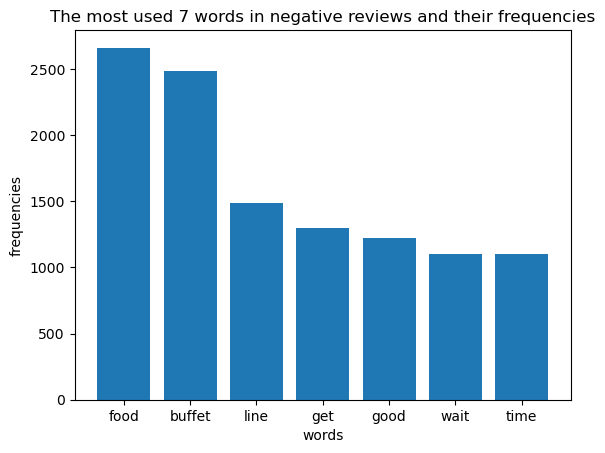

In [58]:
import matplotlib.pyplot as plt

words = [i[0] for i in top_seven]
freqs = [i[1] for i in top_seven]

plt.bar(words, freqs);
plt.title("The most used 7 words in negative reviews and their frequencies");
plt.xlabel('words');
plt.ylabel('frequencies');

## Sentiment Analysis

In [59]:
TB(df['text'][0]).sentiment.polarity

0.3373304473304473

In [60]:
TB(df['text'][0]).subjectivity

0.5869264069264069

In [61]:
df['polarity'] = [TB(s).sentiment.polarity for s in df['text']]

In [62]:
df['subjectivity'] = [TB(s).sentiment.subjectivity for s in df['text']]

In [63]:
df.head()

,stars,useful,funny,cool,text,date,positivity,polarity,subjectivity
0,5,0,1,0,after getting food poisoning at the palms hote...,2012-12-04 03:10:18,2,0.337330,0.586926
1,4,39,21,29,a feast worthy of godsbaccarnal buffet in caes...,2014-01-17 00:50:50,2,0.219409,0.537292
2,4,1,1,1,the crab legs are better than the ones at wick...,2015-06-08 18:03:09,2,-0.134722,0.731944
3,1,0,0,0,not worth it too salty food and expensive this...,2016-12-19 16:15:29,0,-0.325000,0.400000
4,5,0,0,0,i would give this infinite stars if i could my...,2015-07-28 07:13:17,2,0.362500,0.725000


In [64]:
df.polarity.describe()

count    10369.000000
mean         0.226049
std          0.196761
min         -1.000000
25%          0.114142
50%          0.216667
75%          0.332500
max          1.000000
Name: polarity, dtype: float64

In [65]:
df.subjectivity.describe()

count    10369.000000
mean         0.531224
std          0.121012
min          0.000000
25%          0.460556
50%          0.529613
75%          0.600000
max          1.000000
Name: subjectivity, dtype: float64

### Wordcloud based on polarity.

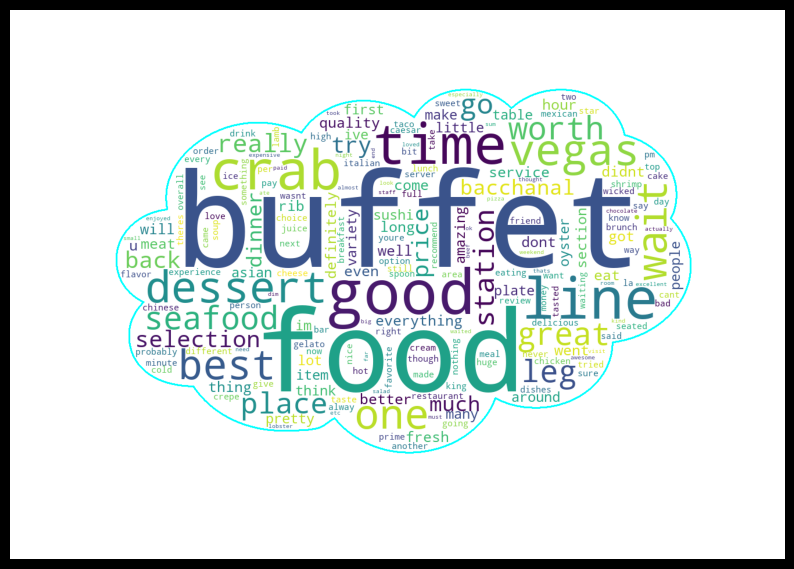

In [66]:
wc(df[df['polarity'] > 0]['text'])

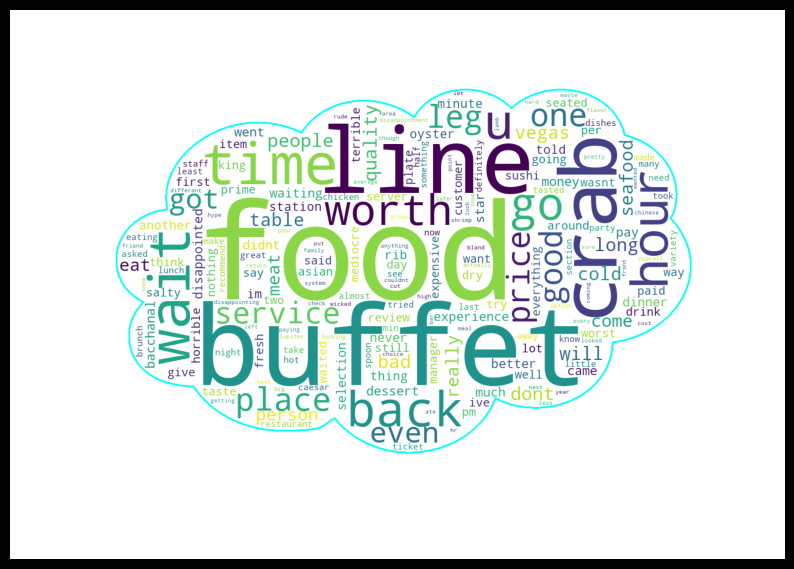

In [67]:
wc(df[df['polarity'] < 0]['text'])

## Modelling

We will predict the number of stars based on vectorized text.

In [68]:
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier

# Vectorization
from nltk.stem import PorterStemmer
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer

# Metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split as tts

In [70]:
# Models
svc = SVC()
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
mnb = MultinomialNB()
bnb = BernoulliNB()
gbc = GradientBoostingClassifier()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()

# Save all the algorithms in an array to test them later.
algorithms = [svc, knc, dtc, mnb, bnb, gbc, rfc, abc]

# Porter Stemmer
pr = PorterStemmer()

In [71]:
def compare_algorithms(x, y, algs=algorithms):
    x_train, x_test, y_train, y_test = tts(x, y, test_size=.2, random_state=42)
    for alg in algs:
        algname = str(alg)[:-2]
        model = alg.fit(x_train, y_train)
        pred = model.predict(x_test)

        accuracy = accuracy_score(pred, y_test)
        print(f'Accuracy of {algname}: {accuracy * 100:.2f}%')
        
        cm = confusion_matrix(pred, y_test)
        plt.title(f'Confusion matrix for {algname}');
        sns.heatmap(cm, annot=True, fmt='g')  # 'fmt' is used to avoid scientific notation
        plt.title(f'Confusion Matrix for {algname}')
        plt.xlabel('Predicted labels')
        plt.ylabel('True labels')
        plt.show()
        print()

In [72]:
x = df['text']
y = df['positivity']

In [73]:
def lemmafn(text):
    words = TextBlob(text).words
    return [pr.stem(word) for word in words if word not in stopwords.words("english")] # Handle stopwords

In [74]:
cv = CountVectorizer(analyzer=lemmafn)

In [75]:
x = cv.fit_transform(x)

Accuracy of SVC: 79.32%


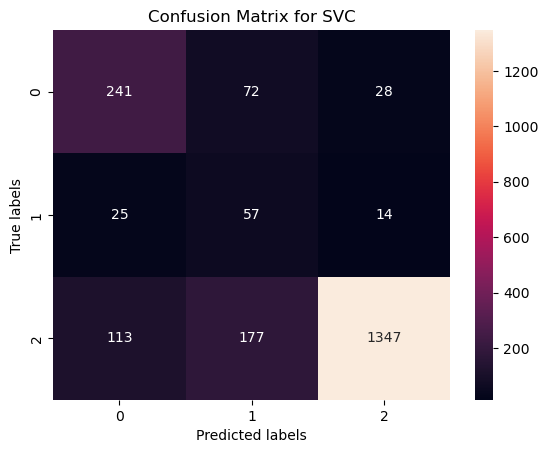


Accuracy of KNeighborsClassifier: 68.85%


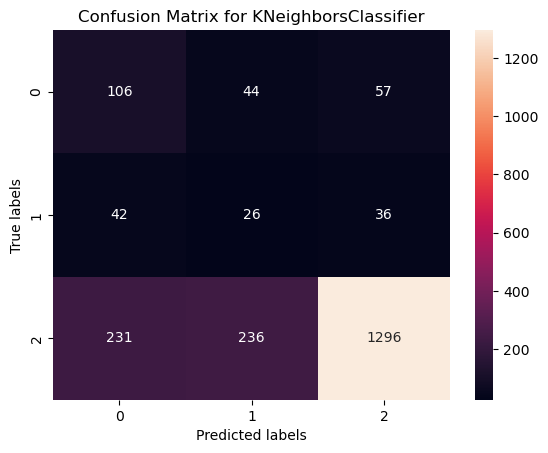


Accuracy of DecisionTreeClassifier: 68.56%


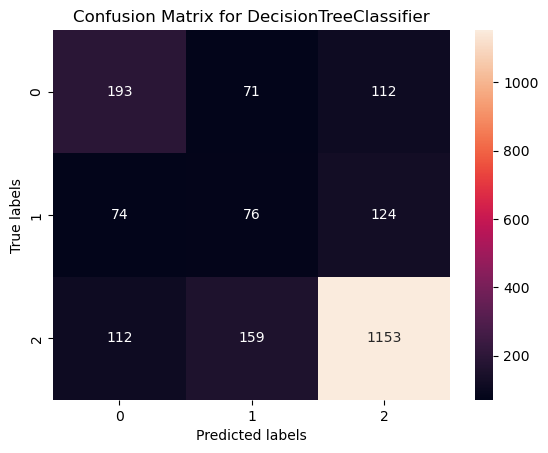


Accuracy of MultinomialNB: 78.25%


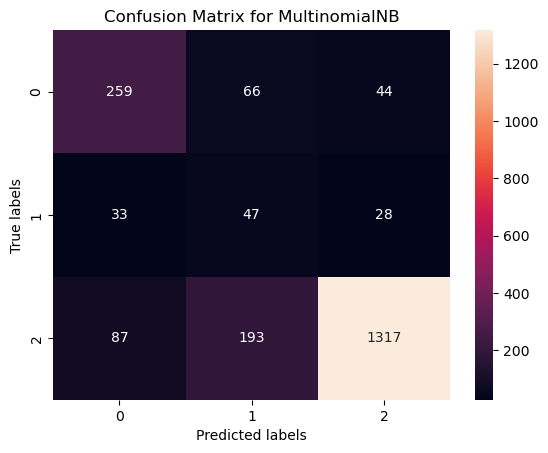


Accuracy of BernoulliNB: 69.72%


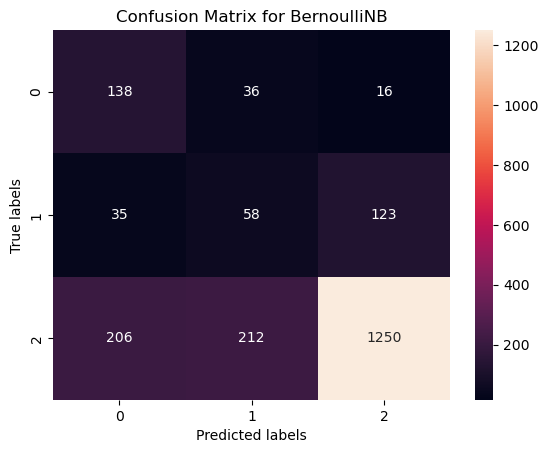


Accuracy of GradientBoostingClassifier: 77.92%


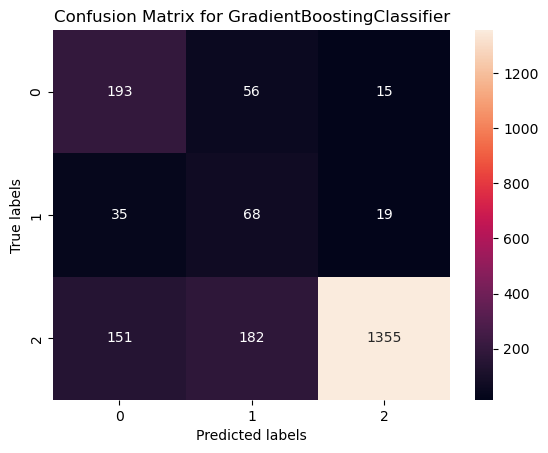


Accuracy of RandomForestClassifier: 73.10%


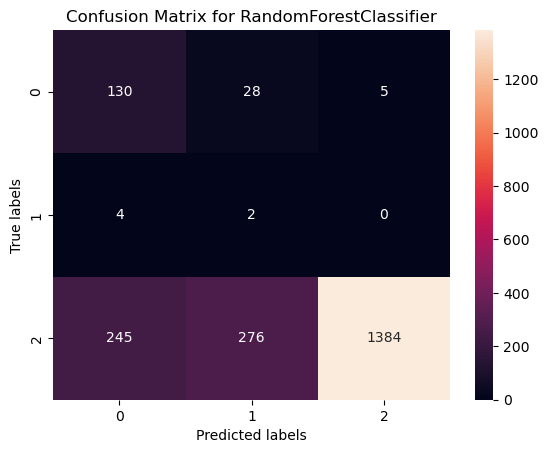


Accuracy of AdaBoostClassifier: 77.43%


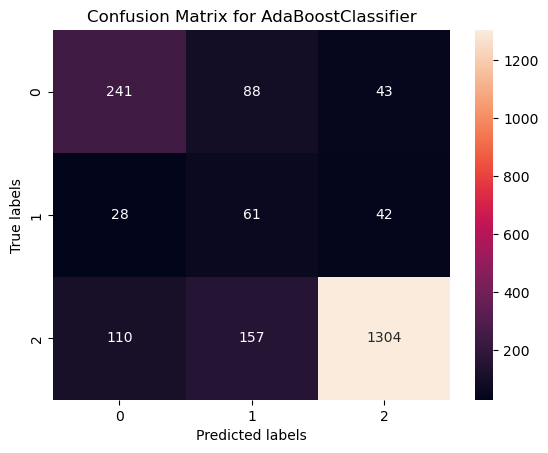

In [76]:
compare_algorithms(x, y)

## Conclusion

I extracted the polarity and subjectivity of each review text and assigned them to their respected columns. For this I used some common nlp techniques like converting all to lowercase, removing punctuation, newline characters, digits etc. I defined a new column to classify reviews. Reviews with 4 or 5 stars get the positivity of 2. Reviews with 3 stars get the positivity of 1. Reviews with 1 or 2 stars get the positivity of 0. I also created several word clouds for positive reviews based on both polarities and stars, as well as 5 star and 1 star reviews. I showcased the most commonly used 7 words for the negative reviews and demosntrated my findings on a bar chart. I then vectorized the text column to build a predictive model that guesses the positivity of each review based on the text. I used several classification algorithms  with varying degrees of success and concluded that Support Vector Machine performs the best, with a success rate of close to 79%.